# Stocks vs Rental Property Investment Model

## Introduction 

__I hear a lot of times about folks investing in a rental property. So as an exercise in curiousity, I decided to simulate the money that can be made by investing in the stock market, versus investing in a rental property.__

## Investing in the stock market

__First we look at investing in the stock market.__ 



### Assumptions

For this analysis, we make the following assumption
1. We will look at different average growth rates. Historically, the S&P500 has <a href="https://www.investopedia.com/ask/answers/042415/what-average-annual-return-sp-500.asp" target="_blank">yielded 9.8% returns</a>. 
2. We will use a divident rate of 3% 
3. The pricipal is compounded yearly

In [1]:
#Import the required libraries

import numpy as np
import matplotlib.pyplot as pp
import pprint
%matplotlib inline

### Define variables

Once the necessary libraries are imported, next, we will define the variables
1. Principal is the initial investment 
2. Growth rate is a array of average growth rates, here we will look at growth rates between 2-12% 
3. Dividend rate is the yearly dividends you get from your investments

In [2]:
principal = 100000 

growth_rate = np.linspace(1.02,1.12,20) #this is how much the stocks/principal will grow over time
time = np.linspace(0,29,30)
dividend_rate = 0.03 #dividends that you get 


### Calculate the growth and interest

In [8]:
#Define an array where the principal for every year will be stored
yearly_principal = np.empty((0,len(time)))

#Calculate the increase in the value of investment for different values of growth rate

for i in growth_rate: #This loop will calculate the value for each growth rate
    pr = []
    for t  in time: 
        revenue = principal * pow(i,t)
        pr.append(revenue)  
        
    yearly_principal = np.append(yearly_principal,[pr],axis =0)

#Calculate the interest paid due to dividends 
interest = yearly_principal * dividend_rate


### Calculate the combined value

__The combined value is calculated for a time period of 30 years. This is done because the normal mortgage period is 30 years, and later on we will do a comparative analysis with owning a rental property__

In [4]:
#Final value
final = []

#Calculate the total final value of the investment 
for n in range(0,len(growth_rate)):
    current_tot_val = sum(interest[n,0:(len(time)-1)])+yearly_principal[n,(len(time)-1)]
    final.append(current_tot_val)

    
final = np.asarray(final) #convert to array for mathematical manipulations 



### Plot the data

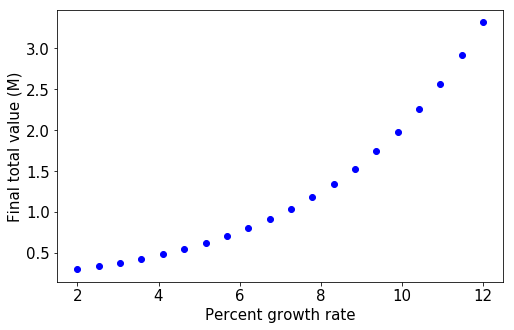

In [21]:
#manipulation for plotting

final_in_millions = final/1000000
percent_growth = (growth_rate - 1)*100

#plotting the data
pp.figure(figsize=(8,5))
pp.rcParams.update({'font.size': 15})
pp.plot(percent_growth,final_in_millions,'ob');
pp.xlabel("Percent growth rate");
pp.ylabel('Final total value (M)');

## Investing in a rental property

### Assumptions

1. We invest in a rental property of USD 500,000
2. Pay 20% down payment (USD 100,000)
3. monthly mortgage rate at 4% interest, 30 year term
4. Inflation rate of 3%
5. The analysis __does not__ take into account tax breaks due to mortgage payments, or income tax implications due to rental earnings 

In [10]:
#Declare Constants
down_payment = 100000
home_cost = 500000
mortgage = 1910 #monthly mortgage rate at 4% interest, 30 year term
taxes = 338
insurance = 233 #initial cost of insurance
rent_m = 2000 #initial rent
rate = 1.04 #approximate increase rate for property, insurance rate and rent. #this is assumed as inflation + 1%


In [11]:
#declare vectors/lists to store time dependent costs
annual_rev = []
annual_cost =[]
home_val = []
time = []

### Calculate time dependent revenues and costs

In [12]:
for t  in range(0,30):
    revenue_2 = rent_m * pow(rate,t)*12
    annual_rev.append(revenue_2)
    
    cost = ((mortgage + taxes + insurance*pow(rate,t))*12) + (revenue_2*0.2) 
    #The multiplication factor of 1.2 is 20% variable expenses such as repairs, empty property etc. 
    annual_cost.append(cost)
    
        
    curr_home_val = home_cost* pow(rate,t)
    home_val.append(curr_home_val)
    
    time.append(t)

### Calculate the final total value from investing in a rental property 

In [13]:
total_after_30_years = home_val[(len(time)-1)]+sum(annual_rev)-sum(annual_cost) #calculate total value after loan paid off

print ("Total value after 30 years is ", int(total_after_30_years))

Total value after 30 years is  1670063


### Plot earnings and costs 

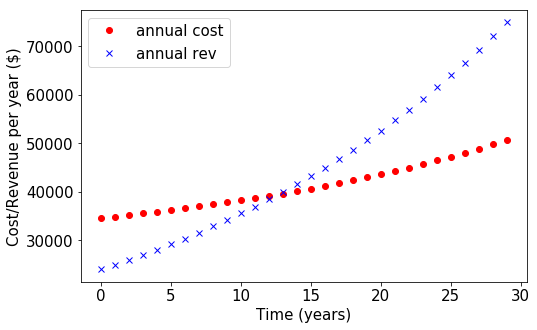

In [22]:
pp.figure(figsize=(8,5))
pp.rcParams.update({'font.size': 15})
pp.plot(time,annual_cost,'or',time,annual_rev,'xb');
pp.xlabel("Time (years)");
pp.ylabel('Cost/Revenue per year ($)');
pp.legend(('annual cost','annual rev'));

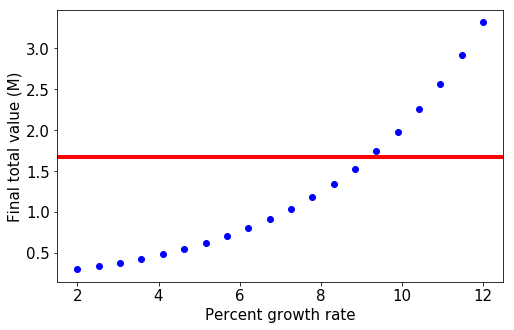

In [31]:
house_total_mil = total_after_30_years/1e6

#plotting the data
pp.figure(figsize=(8,5))
pp.rcParams.update({'font.size': 15})
pp.plot(percent_growth,final_in_millions,'ob');
pp.xlabel("Percent growth rate");
pp.ylabel('Final total value (M)');
pp.axhline(y = house_total_mil, linewidth=4, color='r');

## Data summary 

1. Investing in either a rental property or in the stock market will generate significant returns over time. 
2. If we look at rental properties, it takes 12 years to start earning more than you will be spending on the home. This is about the time when the rent would have risen due to inflation, but your mortgage rates remain constant. 
3. __Rental property vs Stock Market__: The last figure shows this comparison. The red line at 1.65 million denotes the value of the property and the money earned. As you can see, to earn a similar amount of money in the share market, the average rate of return needs to be >9.3%. 
4. If we take the historic S&P 500 rate of 9.8%, then the stock market would yield 1.9 M. This is ~18% more than the housing investment. However, this number is over a period of 30 years, with a yearly average difference of <1%. 
5. Though both methods seem to be giving the similar amount of money
    1. Stock market gives 18% more yield over 30 years
    2. Investing in a stock market, especially today, is a lot easier than maintaining a rental property
    3. However, stocks do not give the intangible feeling of ownership that a property can.